In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/MyDrive/VIP CUP/IR.zip" -d /content/Drone_IR_Dataset


In [ ]:
import os, random, shutil

base_path = '/content/Drone_IR_Dataset'
images_dir = os.path.join(base_path, 'IR/images')
labels_dir = os.path.join(base_path, 'IR/labels')

split_base = '/content/Drone_IR_Split'
os.makedirs(f'{split_base}/images/train', exist_ok=True)
os.makedirs(f'{split_base}/images/val', exist_ok=True)
os.makedirs(f'{split_base}/labels/train', exist_ok=True)
os.makedirs(f'{split_base}/labels/val', exist_ok=True)

images = sorted([f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')])
random.seed(42)
random.shuffle(images)

split_index = int(len(images) * 0.8)
train_imgs = images[:split_index]
val_imgs = images[split_index:]

def move_files(file_list, split):
    for f in file_list:
        shutil.copy(os.path.join(images_dir, f), f'{split_base}/images/{split}/{f}')
        label_name = f.replace('.jpg', '.txt').replace('.png', '.txt')
        shutil.copy(os.path.join(labels_dir, label_name), f'{split_base}/labels/{split}/{label_name}')

move_files(train_imgs, 'train')
move_files(val_imgs, 'val')


In [ ]:
yaml_content = """
path: /content/Drone_IR_Split
train: images/train
val: images/val
nc: 2
names: ['bird', 'drone']
"""

with open('/content/drone_ir.yaml', 'w') as f:
    f.write(yaml_content)


In [ ]:
!pip install -q ultralytics
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # use yolov8s.pt for more accuracy, yolov8n.pt for speed

model.train(
    data='/content/drone_ir.yaml',
    epochs=10,
    imgsz=320,
    batch=16
)
model.save('/content/drive/MyDrive/VIP CUP/drone_tracking_model.pt')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyt

100%|██████████| 6.25M/6.25M [00:00<00:00, 130MB/s]


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drone_ir.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True,

100%|██████████| 755k/755k [00:00<00:00, 24.7MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 90.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5.0±1.5 MB/s, size: 6.5 KB)


train: Scanning /content/Drone_IR_Split/labels/train... 46064 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46064/46064 [00:36<00:00, 1250.58it/s]


train: New cache created: /content/Drone_IR_Split/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3.3±1.7 MB/s, size: 7.5 KB)


val: Scanning /content/Drone_IR_Split/labels/val... 11516 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11516/11516 [00:09<00:00, 1266.35it/s]


val: New cache created: /content/Drone_IR_Split/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.578G      2.163        1.7      1.026         16        320: 100%|██████████| 2879/2879 [06:17<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:56<00:00,  6.35it/s]


                   all      11516      12956      0.796      0.718      0.743      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.684G      2.025      1.152     0.9951         18        320: 100%|██████████| 2879/2879 [05:58<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:55<00:00,  6.46it/s]


                   all      11516      12956      0.885      0.796      0.822      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.701G      1.953      1.077      0.976         18        320: 100%|██████████| 2879/2879 [05:51<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:56<00:00,  6.39it/s]


                   all      11516      12956      0.896      0.842       0.86      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.717G      1.885      1.014     0.9621         17        320: 100%|██████████| 2879/2879 [05:46<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:55<00:00,  6.48it/s]


                   all      11516      12956        0.9      0.873      0.896      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.734G      1.811     0.9543     0.9459         17        320: 100%|██████████| 2879/2879 [05:44<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:55<00:00,  6.50it/s]


                   all      11516      12956      0.922       0.88      0.899       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.752G      1.748     0.9071     0.9351         16        320: 100%|██████████| 2879/2879 [05:46<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:55<00:00,  6.47it/s]


                   all      11516      12956      0.927      0.893       0.92      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.768G       1.68     0.8583      0.923         20        320: 100%|██████████| 2879/2879 [05:47<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:55<00:00,  6.52it/s]


                   all      11516      12956      0.936      0.903       0.93       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.785G      1.622     0.8136     0.9131         19        320: 100%|██████████| 2879/2879 [05:47<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:54<00:00,  6.56it/s]


                   all      11516      12956      0.937      0.906      0.935      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.803G      1.556     0.7677     0.9041         16        320: 100%|██████████| 2879/2879 [05:50<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:55<00:00,  6.49it/s]


                   all      11516      12956      0.942      0.908      0.942      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      0.82G      1.497     0.7317     0.8941         17        320: 100%|██████████| 2879/2879 [05:46<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:54<00:00,  6.60it/s]


                   all      11516      12956      0.943      0.917      0.947      0.537

10 epochs completed in 1.133 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:58<00:00,  6.17it/s]


                   all      11516      12956      0.943      0.917      0.947      0.537
                  bird       4115       5555      0.936      0.885      0.926      0.479
                 drone       7401       7401      0.949      0.948      0.967      0.594
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


In [ ]:
!pip install -q ultralytics
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/VIP CUP/drone_tracking_model_new.pt')

model.train(
    data='/content/drone_ir.yaml',  # 🔁 same training data YAML
    epochs=15,                      # total target epochs
    imgsz=320,
    batch=16
)

model.save('/content/drive/MyDrive/VIP CUP/drone_tracking_model_new_1.pt')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyt

100%|██████████| 755k/755k [00:00<00:00, 24.8MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 99.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5.1±1.6 MB/s, size: 6.5 KB)


train: Scanning /content/Drone_IR_Split/labels/train... 46064 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46064/46064 [00:39<00:00, 1180.70it/s]


train: New cache created: /content/Drone_IR_Split/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.3±1.4 MB/s, size: 7.5 KB)


val: Scanning /content/Drone_IR_Split/labels/val... 11516 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11516/11516 [00:09<00:00, 1218.51it/s]


val: New cache created: /content/Drone_IR_Split/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15     0.584G       1.67     0.8702     0.9031         27        320: 100%|██████████| 2879/2879 [06:49<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:59<00:00,  6.08it/s]

                   all      11516      12956      0.953      0.929      0.962      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15     0.684G      1.627     0.8297     0.8933         24        320: 100%|██████████| 2879/2879 [06:26<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:57<00:00,  6.22it/s]


                   all      11516      12956      0.944      0.912      0.948      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15     0.695G      1.694     0.8794     0.9046         32        320: 100%|██████████| 2879/2879 [06:18<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:58<00:00,  6.13it/s]


                   all      11516      12956      0.932      0.887       0.93      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15     0.705G      1.746     0.9227     0.9111         32        320: 100%|██████████| 2879/2879 [06:20<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:00<00:00,  6.00it/s]


                   all      11516      12956      0.938      0.899      0.938      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15     0.717G      1.719     0.8925      0.908         20        320: 100%|██████████| 2879/2879 [06:22<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:00<00:00,  5.98it/s]


                   all      11516      12956      0.941      0.906      0.944      0.527
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15     0.729G      1.539     0.7685     0.9031         16        320: 100%|██████████| 2879/2879 [06:10<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:58<00:00,  6.13it/s]


                   all      11516      12956      0.948       0.92      0.949      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      0.74G      1.488     0.7299     0.8938         19        320: 100%|██████████| 2879/2879 [06:05<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:57<00:00,  6.25it/s]


                   all      11516      12956      0.949      0.919      0.951       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15     0.752G      1.438      0.701     0.8861         19        320: 100%|██████████| 2879/2879 [06:04<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:57<00:00,  6.26it/s]


                   all      11516      12956      0.954      0.925      0.958      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15     0.764G      1.402     0.6805     0.8803         16        320: 100%|██████████| 2879/2879 [06:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:57<00:00,  6.26it/s]


                   all      11516      12956      0.955       0.93      0.961      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15     0.773G      1.361     0.6551     0.8741         16        320: 100%|██████████| 2879/2879 [06:06<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:57<00:00,  6.25it/s]


                   all      11516      12956      0.958      0.935      0.962      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15     0.785G      1.322     0.6321     0.8679         18        320: 100%|██████████| 2879/2879 [06:06<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:57<00:00,  6.26it/s]


                   all      11516      12956      0.962      0.938      0.965      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15     0.797G      1.284     0.6105     0.8633         16        320: 100%|██████████| 2879/2879 [06:09<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:59<00:00,  6.07it/s]

                   all      11516      12956      0.961      0.943      0.968      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15     0.809G      1.243     0.5895     0.8547         19        320: 100%|██████████| 2879/2879 [06:06<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:58<00:00,  6.12it/s]


                   all      11516      12956      0.966      0.943       0.97      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      0.82G      1.211     0.5714     0.8524         18        320: 100%|██████████| 2879/2879 [06:04<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:57<00:00,  6.21it/s]

                   all      11516      12956      0.966      0.947      0.972      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15     0.832G      1.169     0.5514     0.8469         16        320: 100%|██████████| 2879/2879 [06:02<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [00:57<00:00,  6.27it/s]


                   all      11516      12956      0.966      0.946      0.972      0.644

15 epochs completed in 1.799 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:00<00:00,  5.98it/s]


                   all      11516      12956      0.966      0.946      0.972      0.644
                  bird       4115       5555      0.952      0.912      0.955      0.567
                 drone       7401       7401      0.981       0.98       0.99      0.721
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


In [ ]:
!pip install -q ultralytics
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/VIP CUP/drone_tracking_model_new.pt')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyti

In [ ]:
model = YOLO('/content/drive/MyDrive/VIP CUP/drone_tracking_model_new_1.pt')

metrics = model.val(data='/content/drone_ir.yaml')


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 352.6±157.1 MB/s, size: 6.7 KB)


val: Scanning /content/Drone_IR_Split/labels/val.cache... 11516 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11516/11516 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 720/720 [01:05<00:00, 11.06it/s]


                   all      11516      12956      0.966      0.946      0.972      0.644
                  bird       4115       5555      0.951      0.911      0.954      0.567
                 drone       7401       7401      0.981       0.98       0.99      0.721
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val


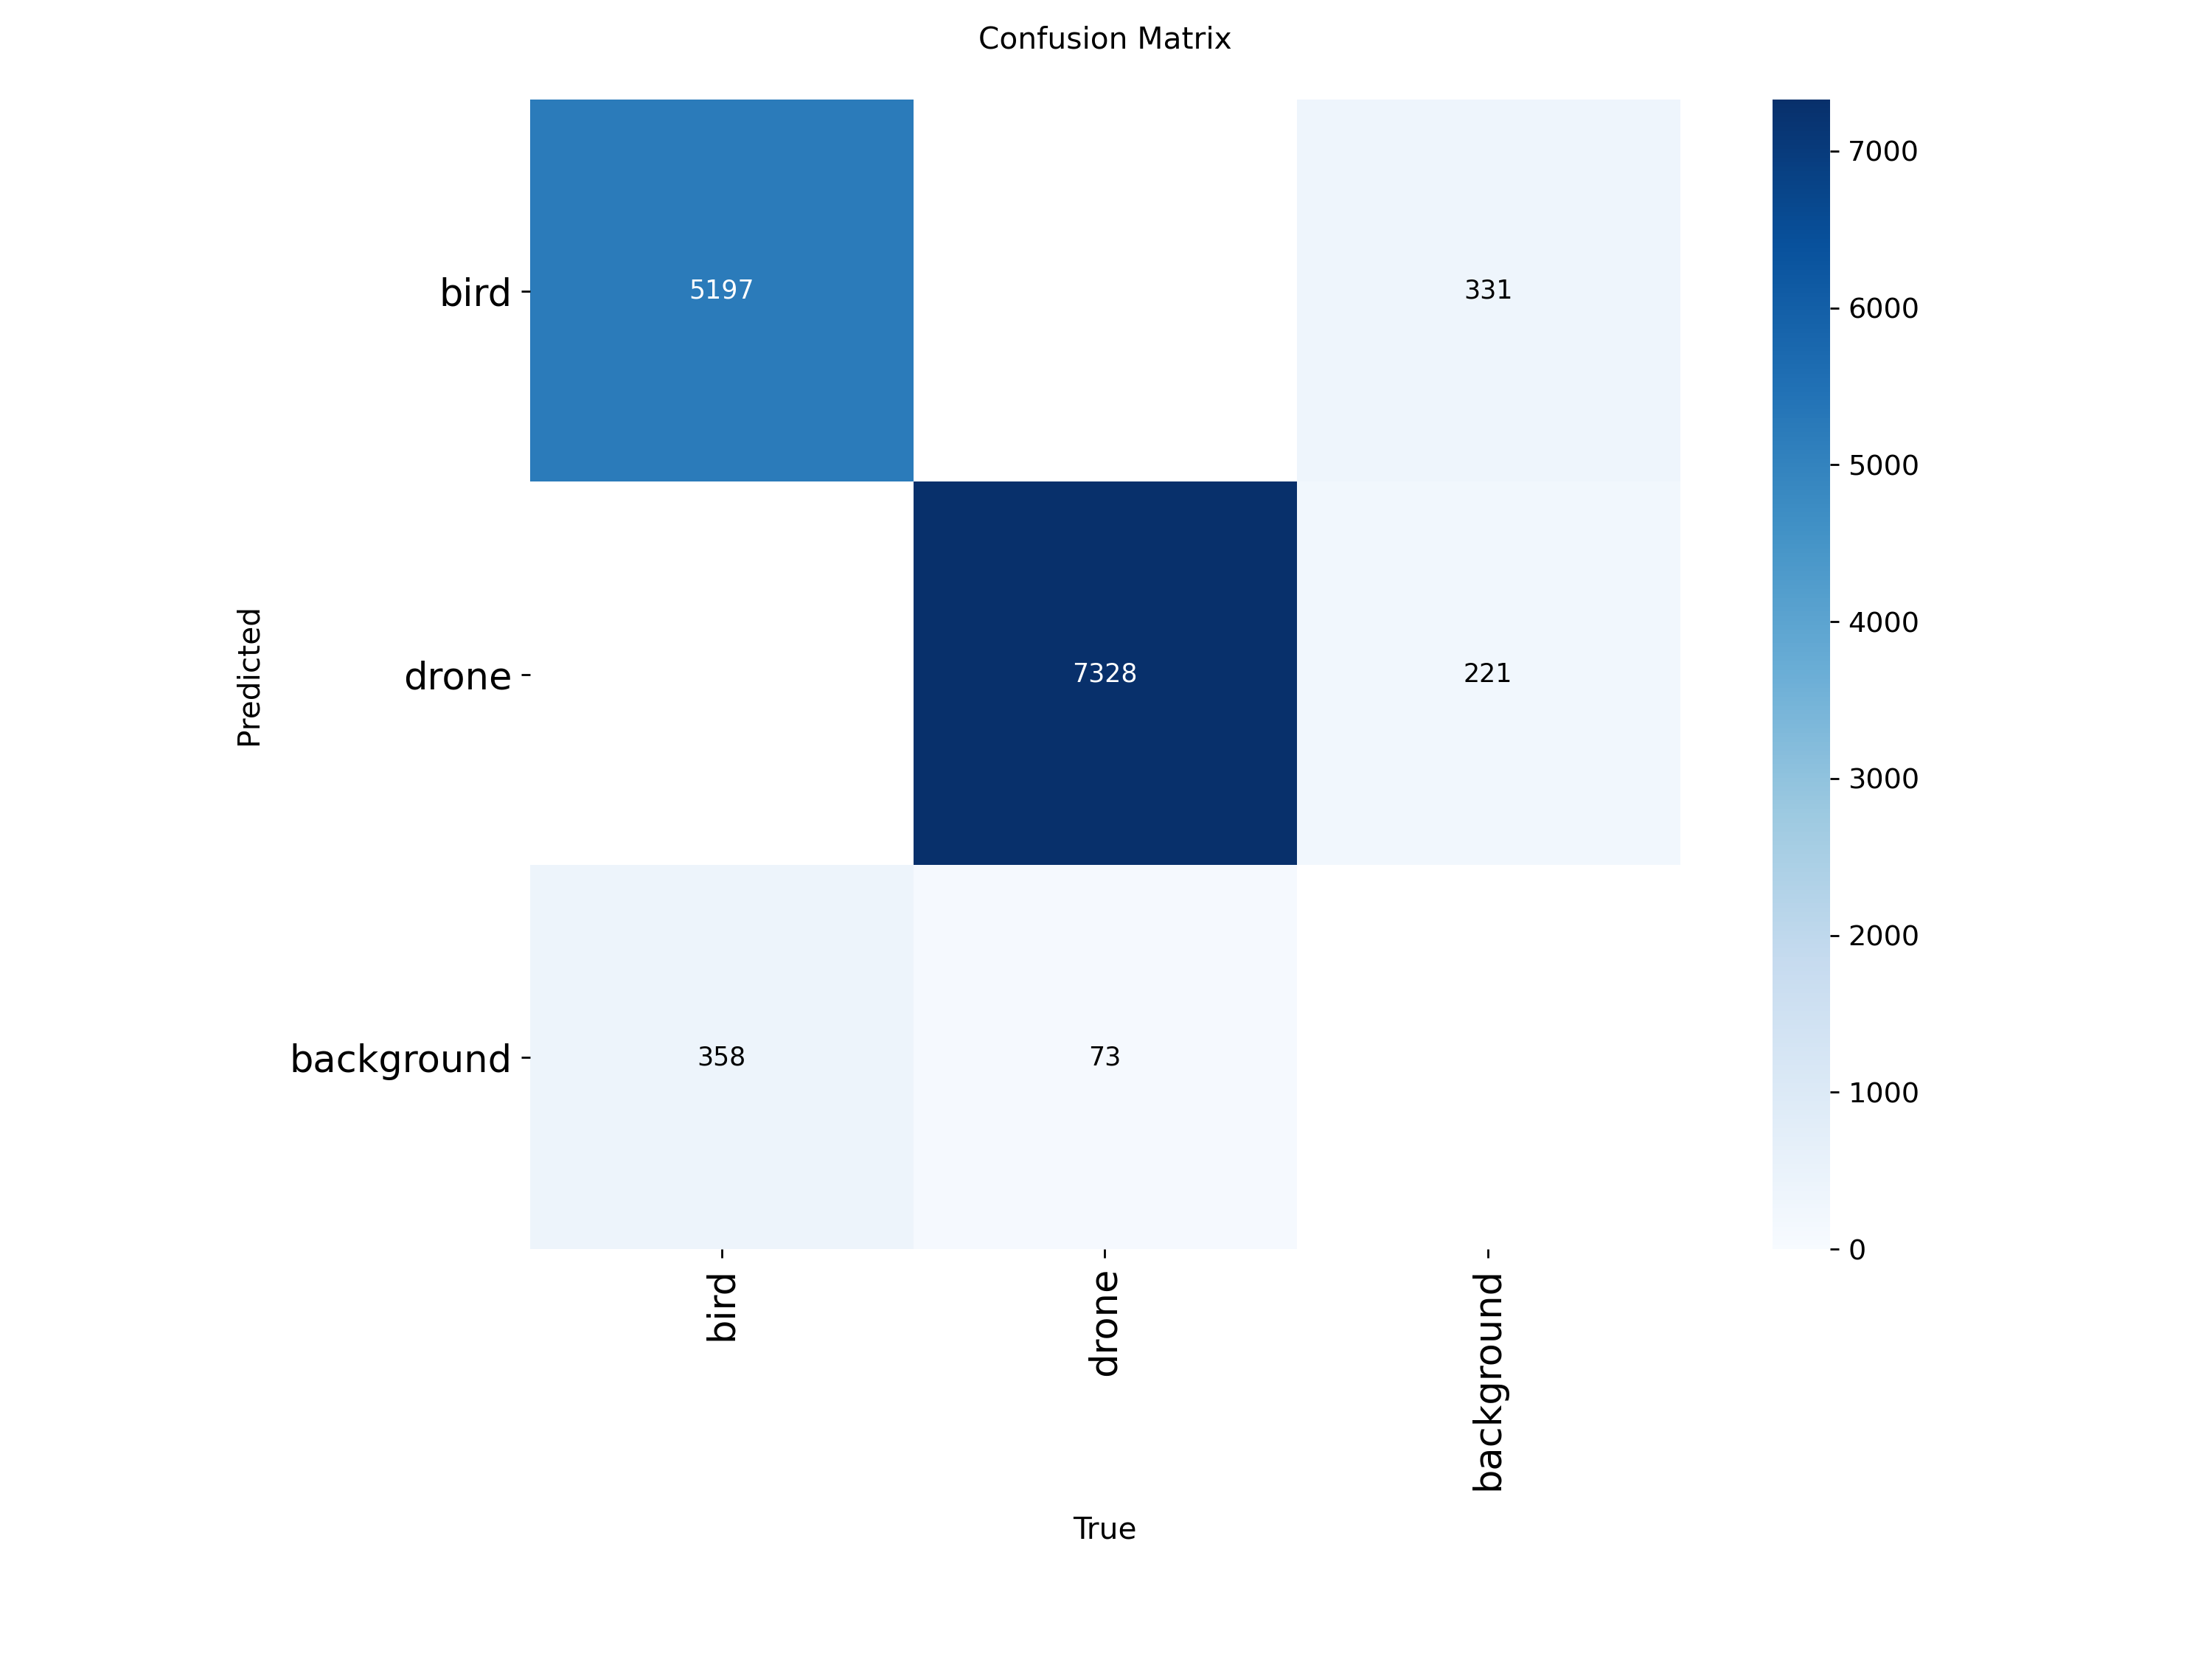

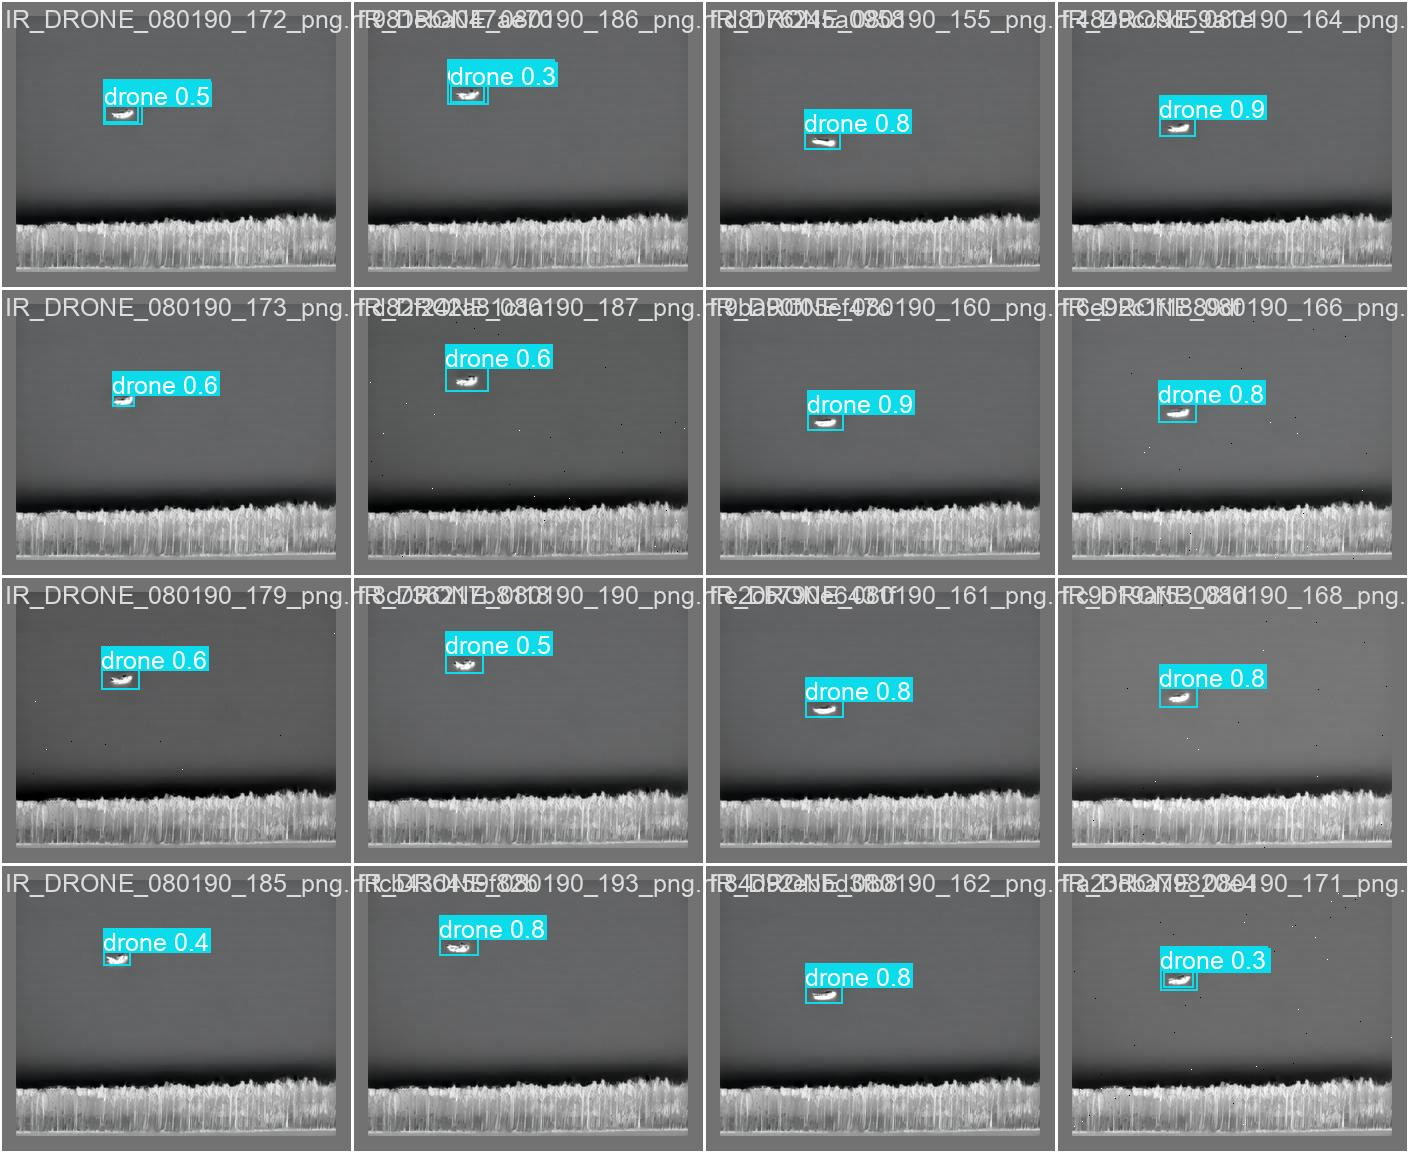

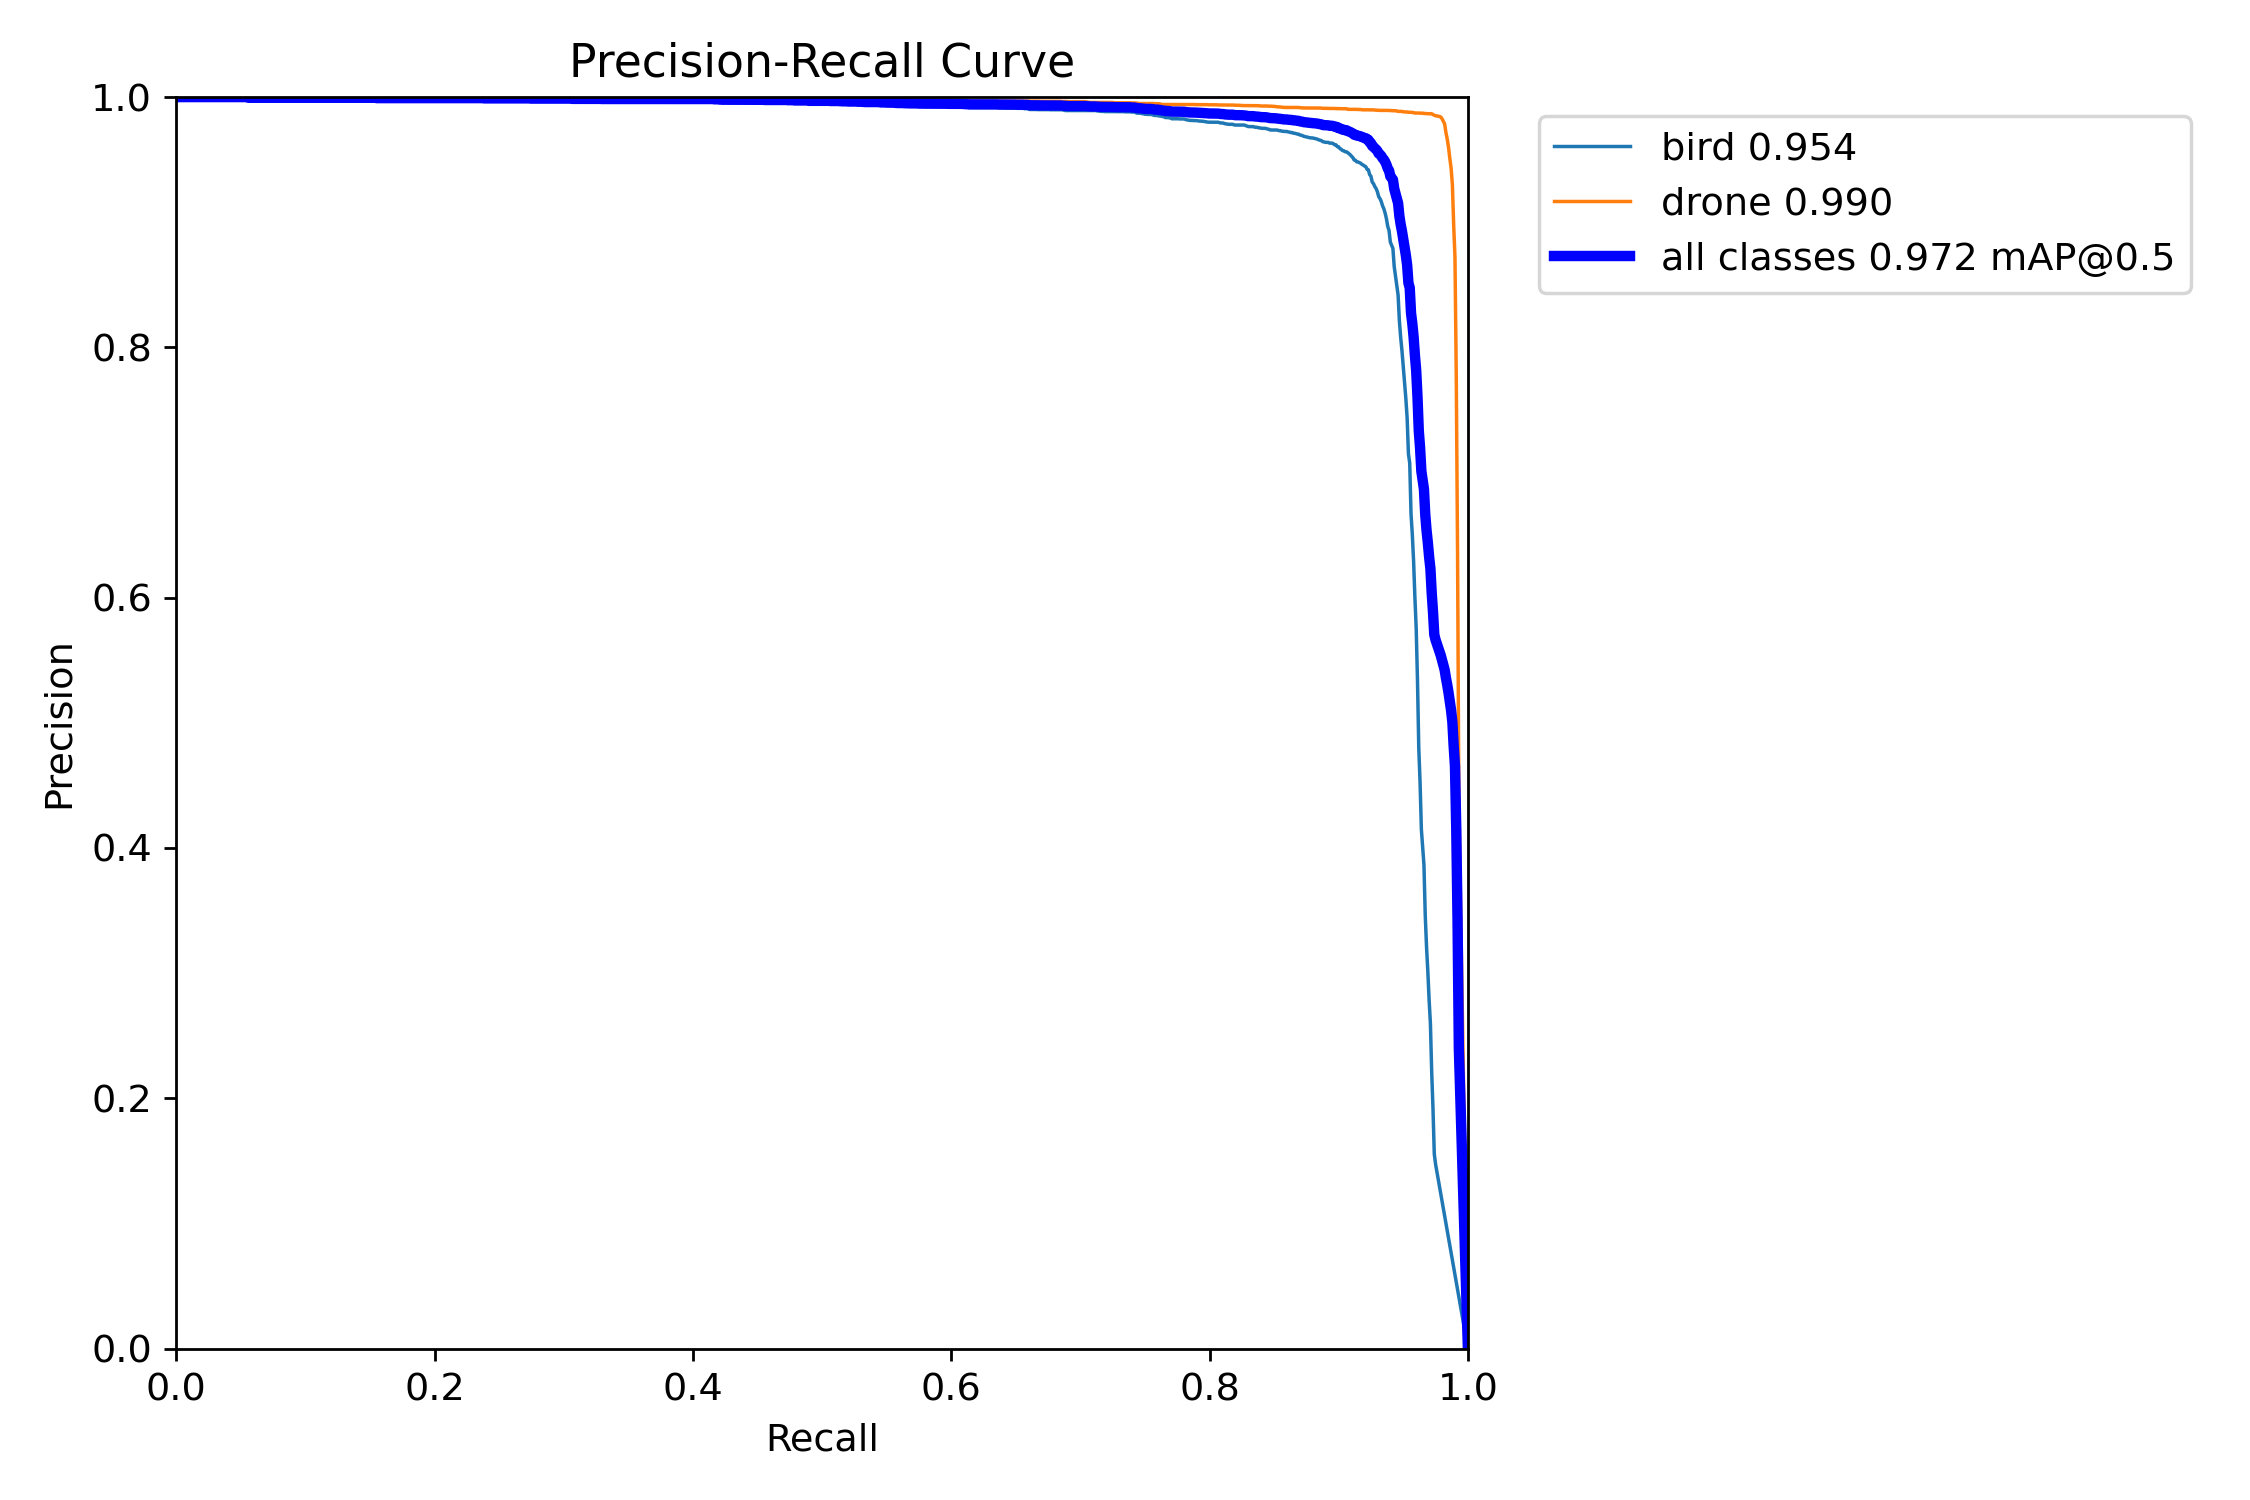

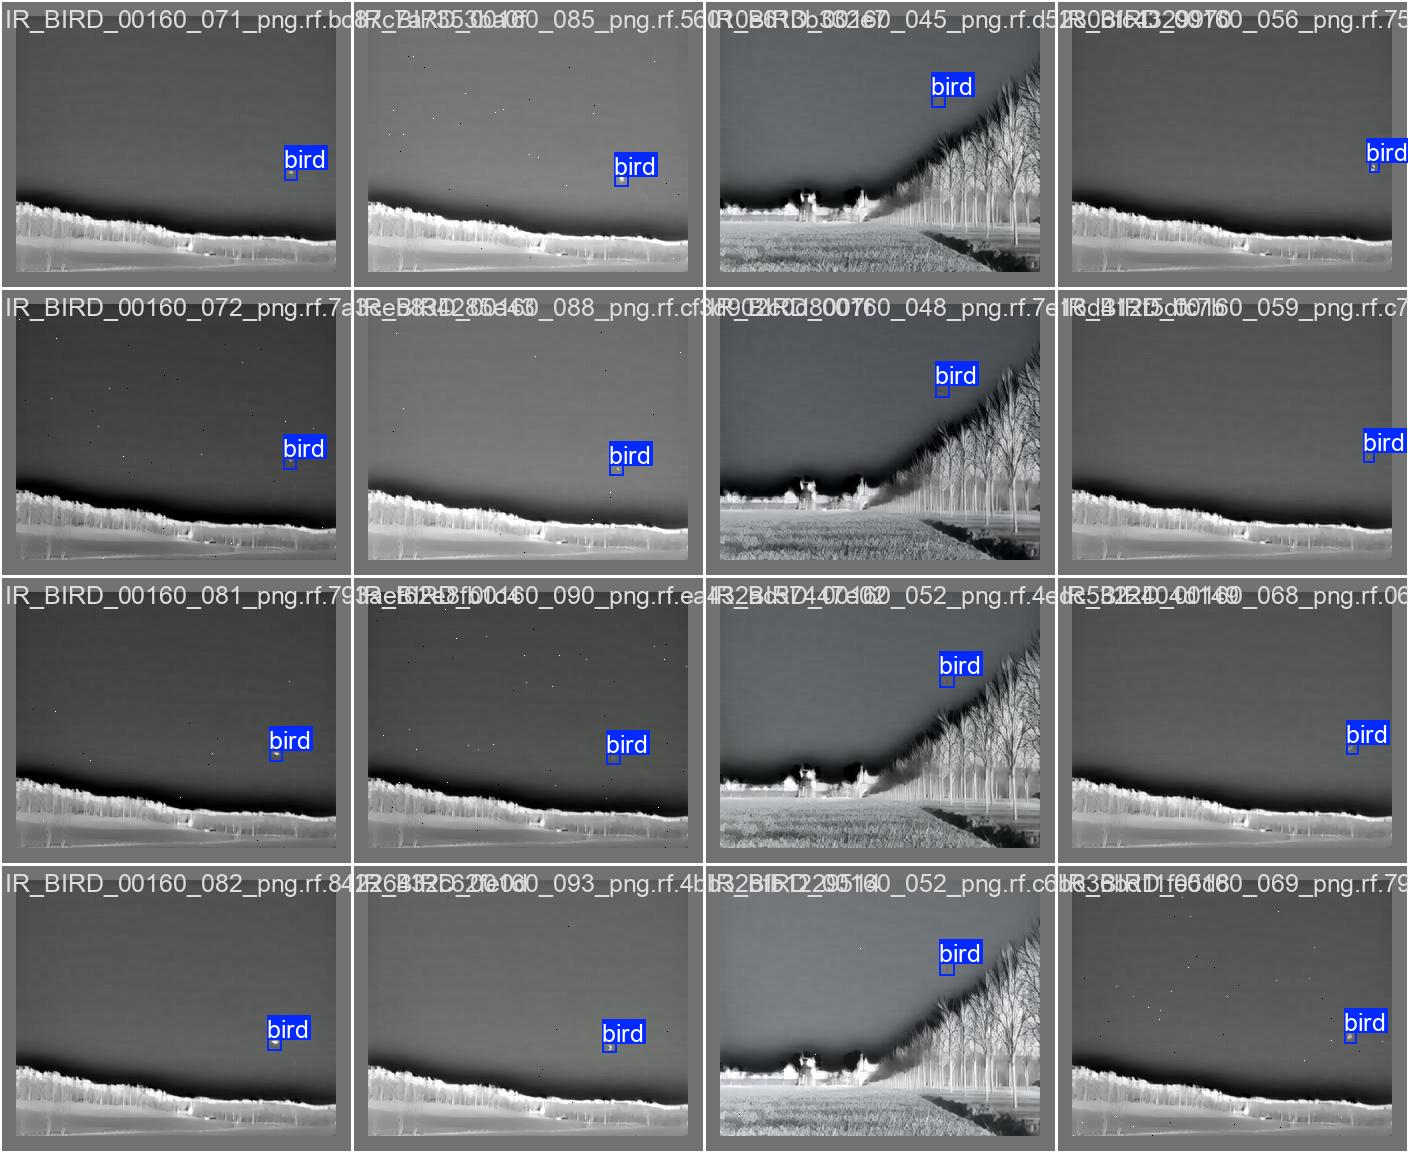

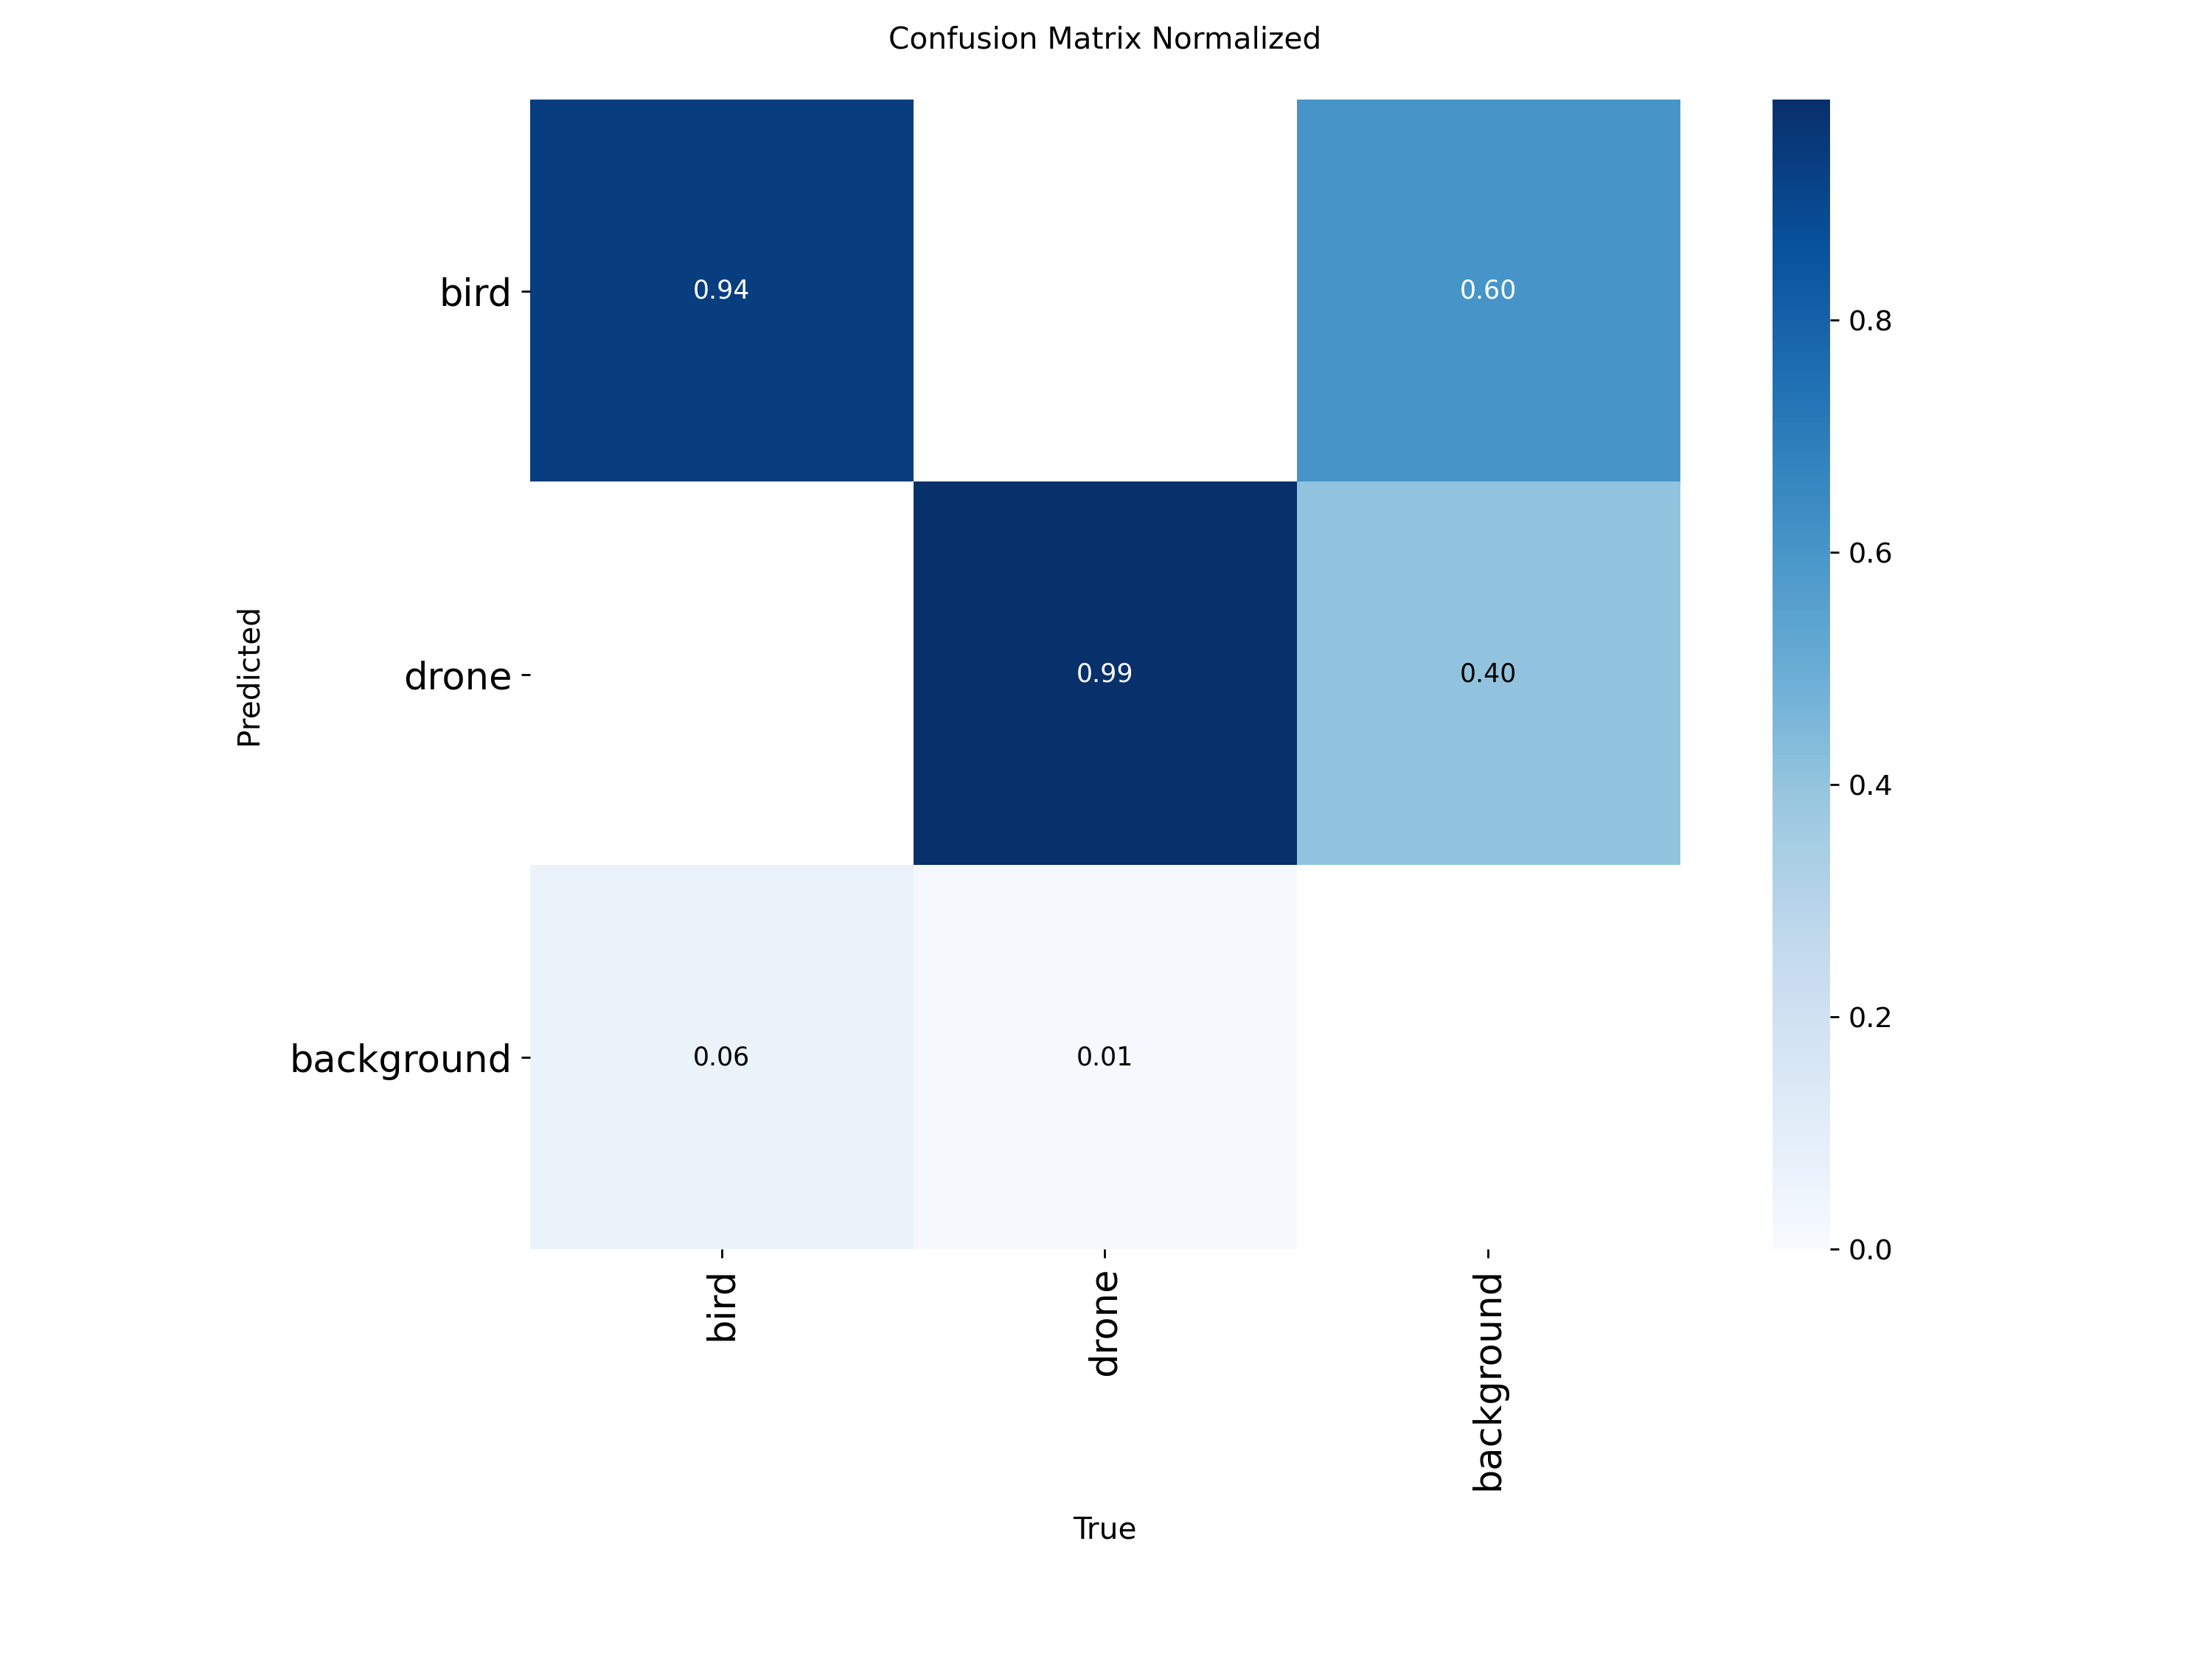

In [ ]:
from IPython.display import Image, display
import os

val_output = '/content/runs/detect/val'  # Correct folder
sample_preds = [f for f in os.listdir(val_output) if f.endswith(('.jpg', '.png'))][:5]

for pred in sample_preds:
    display(Image(os.path.join(val_output, pred)))



In [ ]:
video_path = '/content/drive/MyDrive/VIP CUP/your_video.mp4'


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/VIP CUP/drone_tracking_model.pt')


In [ ]:
results = model.predict(
    source=video_path,
    conf=0.25,
    save=True,
    save_txt=True
)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/307) /content/drive/MyDrive/VIP CUP/your_video.mp4: 256x320 1 drone, 40.8ms
video 1/1 (frame 2/307) /content/drive/MyDrive/VIP CUP/your_video.mp4: 256x320 1 drone, 9.2ms
video 1/1 (frame 3/307) /content/drive/MyDrive/VIP CUP/your_video.mp4: 256x320 1 drone, 7.0ms
video 1/1 (frame 4/307) /content/drive/MyDrive/VIP CUP/your_video.mp4: 256x320 1 drone, 7.6ms
video 1/1 (frame 5/307) /content/drive/MyDrive/VIP CUP/your_video.mp4: 256x320 

In [ ]:
import IPython
from IPython.display import HTML

output_path = '/content/runs/detect/predict/your_video.mp4'  # replace with actual name if different
IPython.display.Video(output_path, embed=True)
